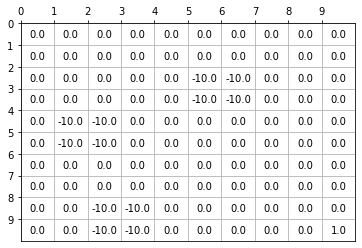

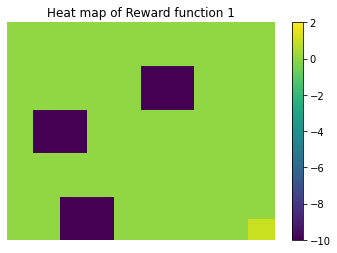

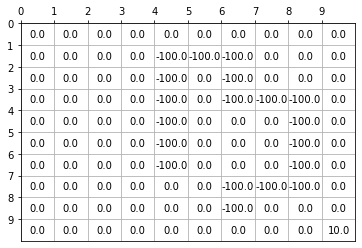

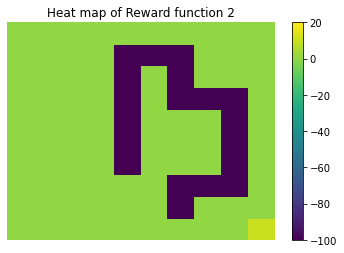

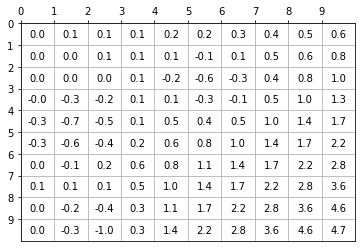

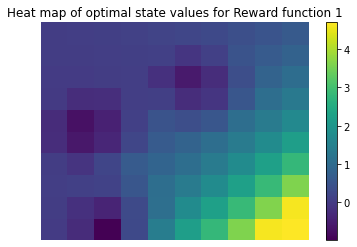

[[3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [3. 3. 3. 0. 0. 0. 3. 3. 1. 1.]
 [0. 0. 0. 0. 0. 0. 3. 3. 1. 1.]
 [0. 0. 3. 1. 1. 1. 1. 3. 1. 1.]
 [0. 0. 3. 3. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 3. 1. 1. 1. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 3. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 1. 1.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 1.]
 [0. 2. 2. 3. 3. 3. 3. 3. 3. 1.]]


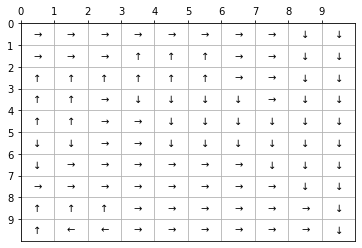

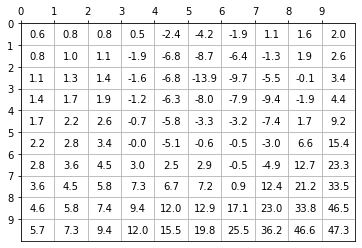

N:  32


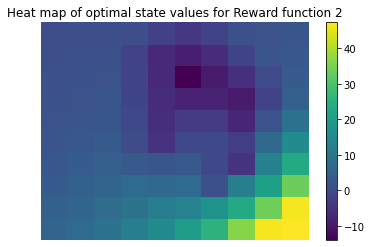

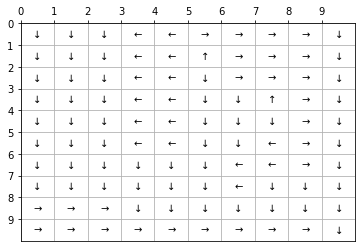

N:  19


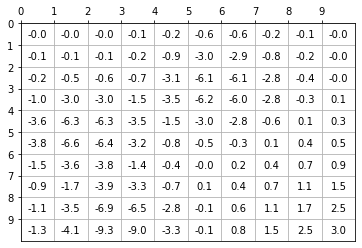

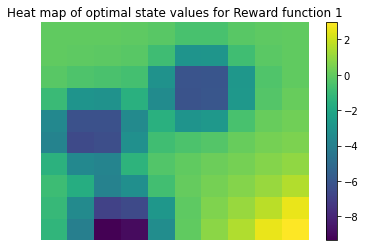

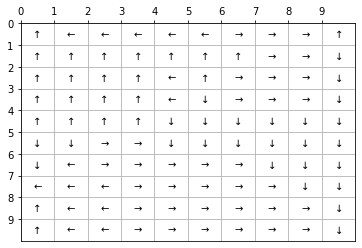

N:  27


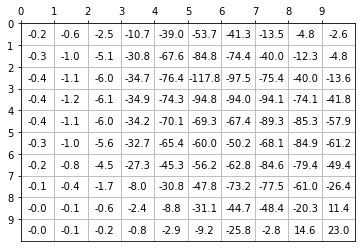

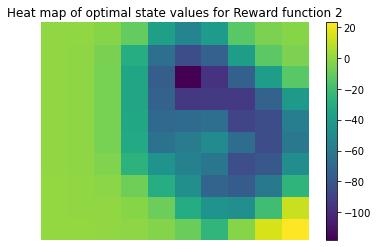

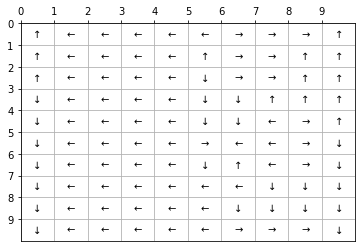

100%|██████████| 501/501 [00:34<00:00, 14.43it/s]


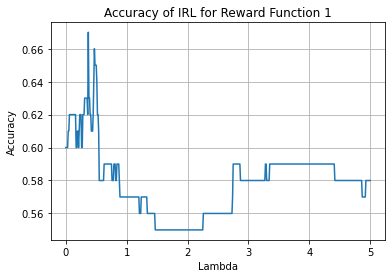

max accuracy: 0.67
corresponding lambda: 0.37


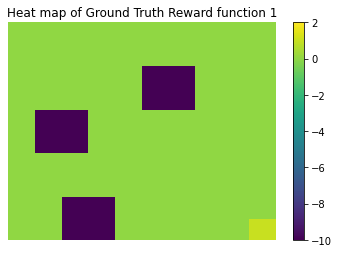

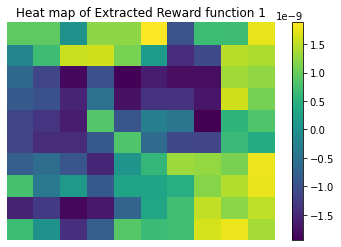

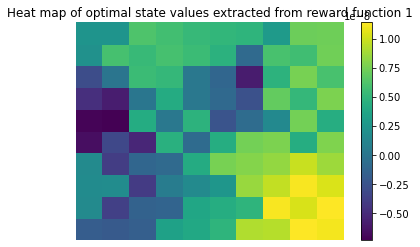

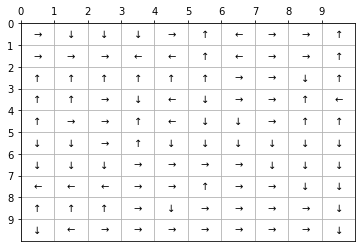

100%|██████████| 501/501 [00:34<00:00, 14.38it/s]


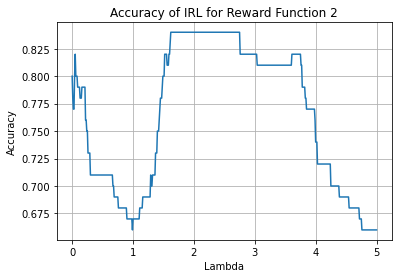

max accuracy: 0.84
corresponding lambda: 1.62


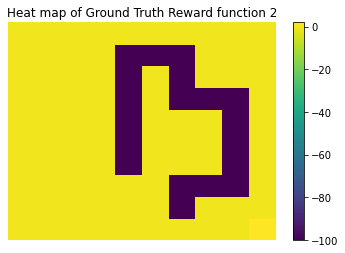

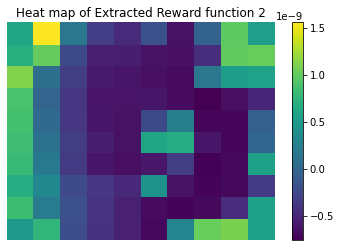

In [1]:
# import functions
%run q1_9.ipynb

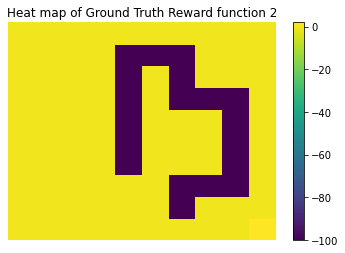

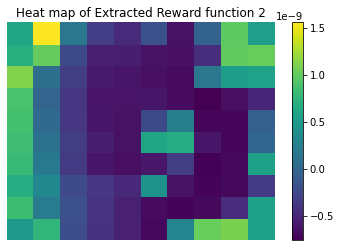

In [2]:
# Question 20
plt.pcolor(np.flipud(reward_states.reshape((10,10)).T), vmax=2)
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Ground Truth Reward function 2')
plt.show()

plt.pcolor(np.flipud(R.reshape((10,10)).T))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Extracted Reward function 2')
plt.show()

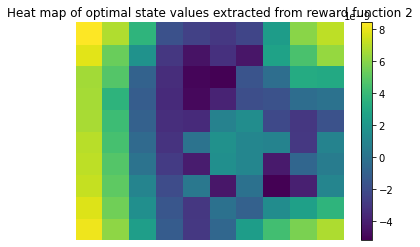

In [3]:
# Question 21
R = irl(policy, gw2, lambdas[np.argmax(acclist)], discount, 1.0)
v, N = optimal_value(gw2.n_states, gw2.n_actions, gw2.transition_probability, R, gw2.discount)
value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = v[i]
plt.pcolor(np.flipud(value_matrix))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values extracted from reward function 2')
plt.show()

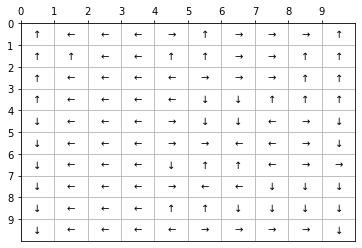

In [4]:
# Question 23
policy_irl = find_policy(gw2.n_states, gw2.n_actions, gw2.transition_probability, R, gw2.discount, stochastic=False)
action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw2.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = policy_irl[i]
plot_arrow(action_matrix)

In [62]:
# Question 25
def modified_optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2, exp_rate=0.1):
    """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (action, state, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """

    v = np.zeros(n_states)
    delta = np.inf
    N = 0

    #write code here
    while delta > threshold:
        delta = 0
        prev = np.copy(v)
        for s in range(0, 100):
            up = np.sum(transition_probabilities[0][s] * (reward + (discount*prev)))
            down = np.sum(transition_probabilities[1][s] * (reward + (discount*prev)))
            left = np.sum(transition_probabilities[2][s] * (reward + (discount*prev)))
            right = np.sum(transition_probabilities[3][s] * (reward + (discount*prev)))
            action_values = [up, down, left, right]
            if np.random.uniform(0, 1) <= exp_rate:
                action = np.random.choice(4)
                v[s] = action_values[action]
            else:
                v[s] = max(up, down, left, right)
            delta = max(delta, abs(prev[s] - v[s]))
        N = N + 1
    return v, N
def modified_find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, exp_rate=0, stochastic=False):
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (action, state, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """

    if v is None:
        v, _ = modified_optimal_value(n_states, n_actions, transition_probabilities, reward,
                          discount, threshold, exp_rate)

    def _policy(s):
        up = np.sum(transition_probabilities[0][s] * (reward + (discount*v)))
        down = np.sum(transition_probabilities[1][s] * (reward + (discount*v)))
        left = np.sum(transition_probabilities[2][s] * (reward + (discount*v)))
        right = np.sum(transition_probabilities[3][s] * (reward + (discount*v)))
        if s!=99:
            if s%10==0:
                up=-np.inf
            if s%10==9:
                down = -np.inf
            if s<=9:
                left=-np.inf
            if s>=90:
                right=-np.inf     
        dirs = [up, down, left, right]
        return dirs.index(max(dirs))
     
    policy = np.array([_policy(s) for s in range(n_states)])
    return v, policy

100%|██████████| 501/501 [00:56<00:00,  8.83it/s]


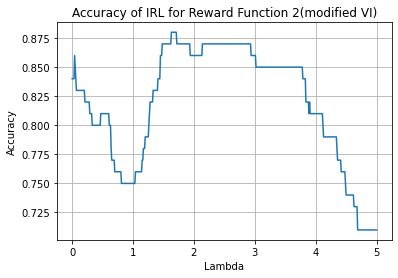

max accuracy: 0.88
corresponding lambda: 1.6300000000000001


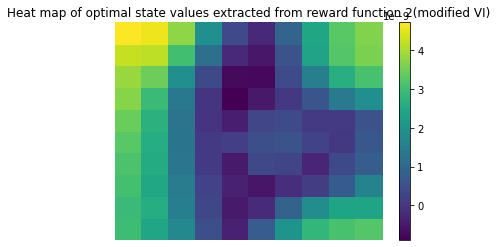

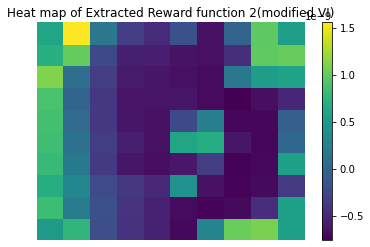

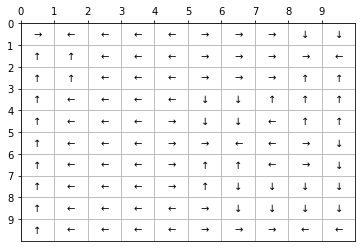

In [66]:
grid_size = 10
wind = 0.6
discount = 0.8

gw2 = Gridworld(grid_size, wind, discount, 2)
reward_states = np.zeros(gw2.n_states)
for i in range(gw2.n_states):
    reward_states[i] = gw2.reward(i)
policy = find_policy(gw2.n_states, gw2.n_actions, gw2.transition_probability, reward_states, gw2.discount, stochastic=False)

acclist = list()
lambdas = np.arange(0, 5+5/500, 5/500)
for _, lm in enumerate(tqdm(lambdas)):
    R = irl(policy, gw2, lm, discount, 1.0)
    #v, _ = modified_optimal_value(gw2.n_states, gw2.n_actions, gw2.transition_probability, R, gw2.discount, exp_rate=0,threshold=1e-10)#exp=0.4
    v, policy_irl = modified_find_policy(gw2.n_states, gw2.n_actions, gw2.transition_probability, R, gw2.discount, threshold=1e-10, v=None, exp_rate=0, stochastic=False)
    acc = 0
    for i in range(100):
        if policy_irl[i] == policy[i]:
            acc += 1
    acc /= 100
    acclist.append(acc)

plt.plot(lambdas,acclist)
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy of IRL for Reward Function 2(modified VI)")
plt.grid()
plt.show()
print(f'max accuracy: {max(acclist)}')
print(f'corresponding lambda: {lambdas[np.argmax(acclist)]}')

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw2.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = v[i]
plt.pcolor(np.flipud(value_matrix))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values extracted from reward function 2(modified VI)')
plt.show()

plt.pcolor(np.flipud(R.reshape((10,10)).T))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Extracted Reward function 2(modified VI)')
plt.show()

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw2.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = policy_irl[i]
plot_arrow(action_matrix)

100%|██████████| 501/501 [00:51<00:00,  9.68it/s]


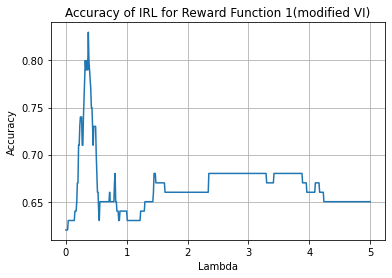

max accuracy: 0.83
corresponding lambda: 0.37


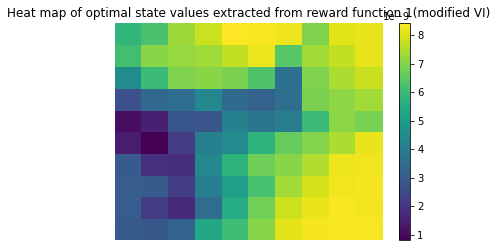

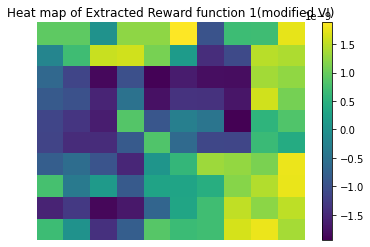

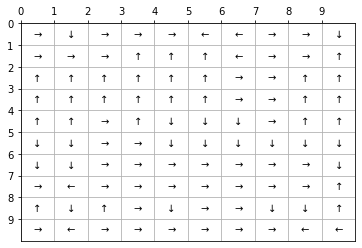

In [67]:
grid_size = 10
wind = 0.1
discount = 0.8

gw1 = Gridworld(grid_size, wind, discount, 1)
reward_states = np.zeros(gw1.n_states)
for i in range(gw1.n_states):
    reward_states[i] = gw1.reward(i)
policy = find_policy(gw1.n_states, gw1.n_actions, gw1.transition_probability, reward_states, gw1.discount, stochastic=False)
acclist = list()
lambdas = np.arange(0, 5+5/500, 5/500)
for _, lm in enumerate(tqdm(lambdas)):
    R = irl(policy, gw1, lm, discount, 1.0)
    #v, _ = modified_optimal_value(gw1.n_states, gw1.n_actions, gw1.transition_probability, R, gw1.discount, exp_rate=0, threshold=1e-10)
    v, policy_irl = modified_find_policy(gw1.n_states, gw1.n_actions, gw1.transition_probability, R, gw1.discount, threshold=1e-10, v=None, exp_rate=0, stochastic=False)
    acc = 0
    for i in range(100):
        if policy_irl[i] == policy[i]:
            acc += 1
    acc /= 100
    acclist.append(acc)

plt.plot(lambdas,acclist)
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy of IRL for Reward Function 1(modified VI)")
plt.grid()
plt.show()
print(f'max accuracy: {max(acclist)}')
print(f'corresponding lambda: {lambdas[np.argmax(acclist)]}')

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw1.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = v[i]
plt.pcolor(np.flipud(value_matrix))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values extracted from reward function 1(modified VI)')
plt.show()

plt.pcolor(np.flipud(R.reshape((10,10)).T))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Extracted Reward function 1(modified VI)')
plt.show()

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw1.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = policy_irl[i]
plot_arrow(action_matrix)